In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TASK2_dataset.csv')
df.set_index('song_id', inplace=True)
df

,keyword_1,keyword_2,keyword_3,genre
song_id,,,,
74,guitar,happy,distorted,rock
103,brass,energetic,melodic,classical
201,banjo,happy,acoustic,country
194,synth,energetic,heavy,hip-hop
184,synth,energetic,slow,hip-hop
...,...,...,...,...
195,synth,angry,melodic,hip-hop
7,guitar,energetic,fast,pop
14,guitar,happy,rhythmic,pop


In [3]:
print(df['keyword_1'].value_counts())
print(df['keyword_2'].value_counts())
print(df['keyword_3'].value_counts())


keyword_1
guitar    65
synth     43
piano     12
brass     11
violin    10
banjo      6
Name: count, dtype: int64
keyword_2
happy        30
mellow       28
energetic    27
sad          21
angry        12
emotional    11
calm         11
upbeat        4
nostalgic     3
Name: count, dtype: int64
keyword_3
fast         28
melodic      27
slow         23
upbeat       20
rhythmic     14
heavy        10
acoustic      9
twangy        6
distorted     5
danceable     5
Name: count, dtype: int64


In [4]:
def get_tf_idf(df, col):
    keywords = df[col].values
    unique_keywords, counts = np.unique(keywords, return_counts=True)
    tf = counts / len(keywords)

    idf = np.log(len(keywords) / counts)

    tf_idf = tf * idf

    tf_idf_dict = {}

    for i in range(len(unique_keywords)):
        tf_idf_dict[unique_keywords[i]] = np.zeros(len(unique_keywords))
        tf_idf_dict[unique_keywords[i]][i] = tf_idf[i]

    return tf_idf_dict

tf_idf_dict1 = get_tf_idf(df, 'keyword_1')
tf_idf_dict2 = get_tf_idf(df, 'keyword_2')
tf_idf_dict3 = get_tf_idf(df, 'keyword_3')

df['tf_idf_keyword_1'] = df['keyword_1'].map(tf_idf_dict1)
df['tf_idf_keyword_2'] = df['keyword_2'].map(tf_idf_dict2)
df['tf_idf_keyword_3'] = df['keyword_3'].map(tf_idf_dict3)
df


,keyword_1,keyword_2,keyword_3,genre,tf_idf_keyword_1,tf_idf_keyword_2,tf_idf_keyword_3
song_id,,,,,,,
74,guitar,happy,distorted,rock,"[0.0, 0.0, 0.36083636460817314, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.3243337153299145, 0.0, ...","[0.0, 0.0, 0.11499981885525974, 0.0, 0.0, 0.0,..."
103,brass,energetic,melodic,classical,"[0.0, 0.1939993908420682, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.3112522752442789, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3112522752442789, ..."
201,banjo,happy,acoustic,country,"[0.13055808643064004, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.3243337153299145, 0.0, ...","[0.17101273527199082, 0.0, 0.0, 0.0, 0.0, 0.0,..."
194,synth,energetic,heavy,hip-hop,"[0.0, 0.0, 0.0, 0.0, 0.35957140310654745, 0.0]","[0.0, 0.0, 0.0, 0.3112522752442789, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.18284676828467283, 0.0,..."
184,synth,energetic,slow,hip-hop,"[0.0, 0.0, 0.0, 0.0, 0.35957140310654745, 0.0]","[0.0, 0.0, 0.0, 0.3112522752442789, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29022845..."
...,...,...,...,...,...,...,...
195,synth,angry,melodic,hip-hop,"[0.0, 0.0, 0.0, 0.0, 0.35957140310654745, 0.0]","[0.20453272955026416, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3112522752442789, ..."
7,guitar,energetic,fast,pop,"[0.0, 0.0, 0.36083636460817314, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.3112522752442789, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.3158529669721014, 0.0, 0.0, ..."
14,guitar,happy,rhythmic,pop,"[0.0, 0.0, 0.36083636460817314, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.3243337153299145, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2239405006822..."


In [5]:
def get_bag_of_words(df, col):
    keywords = df[col].values
    unique_keywords, counts = np.unique(keywords, return_counts=True)

    bag_of_words_embedding = {}
    for i in range(len(unique_keywords)):
        bag_of_words_embedding[unique_keywords[i]] = np.zeros(len(unique_keywords))
        bag_of_words_embedding[unique_keywords[i]][i] = 1
    
    return bag_of_words_embedding

df['bag_of_words_keyword_1'] = df['keyword_1'].map(get_bag_of_words(df, 'keyword_1'))
df['bag_of_words_keyword_2'] = df['keyword_2'].map(get_bag_of_words(df, 'keyword_2'))
df['bag_of_words_keyword_3'] = df['keyword_3'].map(get_bag_of_words(df, 'keyword_3'))

In [6]:
df

,keyword_1,keyword_2,keyword_3,genre,tf_idf_keyword_1,tf_idf_keyword_2,tf_idf_keyword_3,bag_of_words_keyword_1,bag_of_words_keyword_2,bag_of_words_keyword_3
song_id,,,,,,,,,,
74,guitar,happy,distorted,rock,"[0.0, 0.0, 0.36083636460817314, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.3243337153299145, 0.0, ...","[0.0, 0.0, 0.11499981885525974, 0.0, 0.0, 0.0,...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
103,brass,energetic,melodic,classical,"[0.0, 0.1939993908420682, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.3112522752442789, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3112522752442789, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
201,banjo,happy,acoustic,country,"[0.13055808643064004, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.3243337153299145, 0.0, ...","[0.17101273527199082, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
194,synth,energetic,heavy,hip-hop,"[0.0, 0.0, 0.0, 0.0, 0.35957140310654745, 0.0]","[0.0, 0.0, 0.0, 0.3112522752442789, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.18284676828467283, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ..."
184,synth,energetic,slow,hip-hop,"[0.0, 0.0, 0.0, 0.0, 0.35957140310654745, 0.0]","[0.0, 0.0, 0.0, 0.3112522752442789, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29022845...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...
195,synth,angry,melodic,hip-hop,"[0.0, 0.0, 0.0, 0.0, 0.35957140310654745, 0.0]","[0.20453272955026416, 0.0, 0.0, 0.0, 0.0, 0.0,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3112522752442789, ...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ..."
7,guitar,energetic,fast,pop,"[0.0, 0.0, 0.36083636460817314, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.3112522752442789, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.3158529669721014, 0.0, 0.0, ...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
14,guitar,happy,rhythmic,pop,"[0.0, 0.0, 0.36083636460817314, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.3243337153299145, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2239405006822...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, ..."


## Comparison between the Bag of Words embeddings and LF-IDF embeddings:
In our case, the LF-IDF embeddings would perform better since they capture more information about which words appear the most and we only have a single word in the corpora of a keyword

In [7]:
def pca(data, n_components):
    data_mean = np.mean(data, axis=0)
    data_std = np.std(data, axis=0)
    standardized_data = (data - data_mean) / data_std

    covariance_matrix = np.cov(standardized_data, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

    pca_data = np.dot(eigenvector_subset.transpose(), standardized_data.transpose()).transpose()

    return pca_data, eigenvector_subset

def perform_pca(eigenvector_subset, data, standardize=False):
    standardized_data = data
    if standardize:
        data_mean = np.mean(data, axis=0)
        data_std = np.std(data, axis=0)
        standardized_data = (data - data_mean) / data_std
    pca_data = np.dot(eigenvector_subset.transpose(), standardized_data.transpose()).transpose()
    return pca_data

tf_idf_keyword_1_embeddings = np.array(df['tf_idf_keyword_1'].tolist())
tf_idf_keyword_2_embeddings = np.array(df['tf_idf_keyword_2'].tolist())
tf_idf_keyword_3_embeddings = np.array(df['tf_idf_keyword_3'].tolist())

pca_data1, eigenvector_subset1 = pca(tf_idf_keyword_1_embeddings, n_components=2)
pca_data2, eigenvector_subset2 = pca(tf_idf_keyword_2_embeddings, n_components=2)
pca_data3, eigenvector_subset3 = pca(tf_idf_keyword_3_embeddings, n_components=2)

df['keyword_1_pca1'] = pca_data1[:, 0]
df['keyword_1_pca2'] = pca_data1[:, 1]
df['keyword_2_pca1'] = pca_data2[:, 0]
df['keyword_2_pca2'] = pca_data2[:, 1]
df['keyword_3_pca1'] = pca_data3[:, 0]
df['keyword_3_pca2'] = pca_data3[:, 1]
df.head()

,keyword_1,keyword_2,keyword_3,genre,tf_idf_keyword_1,tf_idf_keyword_2,tf_idf_keyword_3,bag_of_words_keyword_1,bag_of_words_keyword_2,bag_of_words_keyword_3,keyword_1_pca1,keyword_1_pca2,keyword_2_pca1,keyword_2_pca2,keyword_3_pca1,keyword_3_pca2
song_id,,,,,,,,,,,,,,,,
74,guitar,happy,distorted,rock,"[0.0, 0.0, 0.36083636460817314, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.3243337153299145, 0.0, ...","[0.0, 0.0, 0.11499981885525974, 0.0, 0.0, 0.0,...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1.349694,0.370477,-2.051477,0.344695,-0.047019,-0.192033
103,brass,energetic,melodic,classical,"[0.0, 0.1939993908420682, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.3112522752442789, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3112522752442789, ...","[0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",-0.538837,-1.813324,0.695438,-1.910713,-1.646868,1.482767
201,banjo,happy,acoustic,country,"[0.13055808643064004, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.3243337153299145, 0.0, ...","[0.17101273527199082, 0.0, 0.0, 0.0, 0.0, 0.0,...","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",-0.501082,-1.376430,-2.051477,0.344695,-0.055551,-0.233782
194,synth,energetic,heavy,hip-hop,"[0.0, 0.0, 0.0, 0.0, 0.35957140310654745, 0.0]","[0.0, 0.0, 0.0, 0.3112522752442789, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.18284676828467283, 0.0,...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, ...",-1.556300,1.033730,0.695438,-1.910713,-0.058292,-0.247738
184,synth,energetic,slow,hip-hop,"[0.0, 0.0, 0.0, 0.0, 0.35957140310654745, 0.0]","[0.0, 0.0, 0.0, 0.3112522752442789, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29022845...","[0.0, 0.0, 0.0, 0.0, 1.0, 0.0]","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, ...",-1.556300,1.033730,0.695438,-1.910713,-0.203708,-1.817350


In [8]:
tf_idf_keyword_1_embeddings

array([[0.        , 0.        , 0.36083636, 0.        , 0.        ,
        0.        ],
       [0.        , 0.19399939, 0.        , 0.        , 0.        ,
        0.        ],
       [0.13055809, 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.3595714 ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.3595714 ,
        0.        ],
       [0.        , 0.19399939, 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.36083636, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.36083636, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.18284677],
       [0.        , 0.        , 0.36083636, 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.20453273, 0.        ,
        0.        ],
       [0.        , 0

# Choice for combining the embeddings for different keywords:

We choose to use an embedding of three dimensions where each dimension represents the average of the two PCA values for a given keyword

This approach is very similar to what is actually used by YouTube in it's recommendation system

In [9]:
df['embedding'] = df.apply(lambda x: [(x['keyword_1_pca1'] + x['keyword_1_pca2'])/2, (x['keyword_2_pca1'] + x['keyword_2_pca2'])/2, (x['keyword_3_pca1'] + x['keyword_3_pca2'])/2], axis=1)

In [10]:
points = pd.Series()
for i in range(len(df)):

    points.at[df.index[i]] =  df['embedding'].iloc[i]
points

74     [0.8600854425005058, -0.8533911104085169, -0.1...
103    [-1.1760804385189987, -0.6076374270887477, -0....
201    [-0.9387558258380004, -0.8533911104085169, -0....
194    [-0.26128488644763737, -0.6076374270887477, -0...
184    [-0.26128488644763737, -0.6076374270887477, -1...
                             ...                        
195    [-0.26128488644763737, 0.01857163592950927, -0...
7      [0.8600854425005058, -0.6076374270887477, 1.47...
14     [0.8600854425005058, -0.8533911104085169, -0.2...
36     [-0.26128488644763737, 1.4544354724280497, -0....
29     [-0.26128488644763737, 0.017879133459974685, -...
Length: 147, dtype: object

In [11]:
len(points)

147

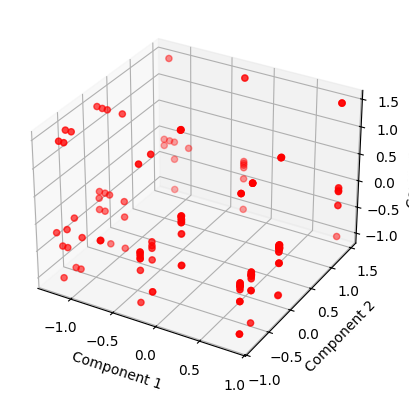

In [12]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['embedding'].apply(lambda x: x[0])
y = df['embedding'].apply(lambda x: x[1])
z = df['embedding'].apply(lambda x: x[2])

ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()

## Optimal Choice of k:
The Embeddings were plottted using desmos [here](https://www.desmos.com/3d/ui3zwls4ck)

Since the embeddings could be deciphered into 8 groups visually, we choose a k = 8

Later, we find the silhouette score for a large range of values of k

In [13]:
k = 8

def euc_dist(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

def assign_clusters(pts, clusters):
    for i in range(len(pts)):
        dist_to_cluster = []
        
        for j in range(k):
            dist_to_cluster.append(euc_dist(pts.iloc[i], clusters[j]['center']))
        min_cluster = np.argmin(dist_to_cluster)
        clusters[min_cluster]['points'].append(pts.iloc[i])
    return clusters

def update_clusters(clusters):
    for i in range(k):
        points = np.array(clusters[i]['points'])
        if points.shape[0] > 0:
            new_center = points.mean(axis =0)
            clusters[i]['center'] = new_center
            
            clusters[i]['points'] = []
    return clusters

def get_clusters(pts, clusters):
    cluster_idxs = []
    for i in range(len(pts)):
        dist = []
        for j in range(k):
            dist.append(euc_dist(pts.iloc[i], clusters[j]['center']))
        cluster_idxs.append(np.argmin(dist))
    return cluster_idxs

def assign_clusters_for_k(k, points):
    clusters = {}
    np.random.seed(23)

    for idx in range(k):
        centroid = np.random.randn(3)
        clusters[idx] = {
            "center": centroid,
            "points": []
        }
    for i in range(100):
        clusters = assign_clusters(points, clusters)
        clusters = update_clusters(clusters)

    clusters = assign_clusters(points, clusters)
    cluster_idxs = get_clusters(points, clusters)
    return clusters, cluster_idxs

In [14]:
clusters, cluster_idxs = assign_clusters_for_k(k, points)

In [15]:
def get_bounding_circle(cluster):
    center = cluster['center']
    radius = 0
    for point in cluster['points']:
        dist = euc_dist(point, center)
        if dist > radius:
            radius = dist
    return center, radius

In [16]:
for key, v in clusters.items():
    print("Cluster", key, "Center:", v['center'], "Number of points:", len(v['points']), "Radius:", get_bounding_circle(v)[1])
    print("Equation for Cluster: ( x -", v['center'][0], ")^2 + ( y -", v['center'][1], ")^2 + ( z -", v['center'][2], ")^2 =", get_bounding_circle(v)[1]**2)

Cluster 0 Center: [ 0.86008544 -0.36020602 -0.27112889] Number of points: 45 Radius: 0.8887879783251217
Equation for Cluster: ( x - 0.8600854425005054 )^2 + ( y - -0.36020601995933416 )^2 + ( z - -0.2711288870911185 )^2 = 0.7899440704152569
Cluster 1 Center: [-0.08092753  1.45443547 -0.29761007] Number of points: 22 Radius: 1.2571302287398456
Equation for Cluster: ( x - -0.08092752649397322 )^2 + ( y - 1.454435472428049 )^2 + ( z - -0.297610070883791 )^2 = 1.5803764120114965
Cluster 2 Center: [-0.30644962 -0.75508964 -0.35218284] Number of points: 15 Radius: 0.6761669003028336
Equation for Cluster: ( x - -0.3064496157403282 )^2 + ( y - -0.7550896370806092 )^2 + ( z - -0.35218284397413735 )^2 = 0.45720167706514203
Cluster 3 Center: [ 0.86008544 -0.43372067  1.47716545] Number of points: 8 Radius: 0.46080634197341275
Equation for Cluster: ( x - 0.8600854425005056 )^2 + ( y - -0.4337206702598638 )^2 + ( z - 1.4771654454624217 )^2 = 0.2123424848029178
Cluster 4 Center: [-0.26128489  0.0211

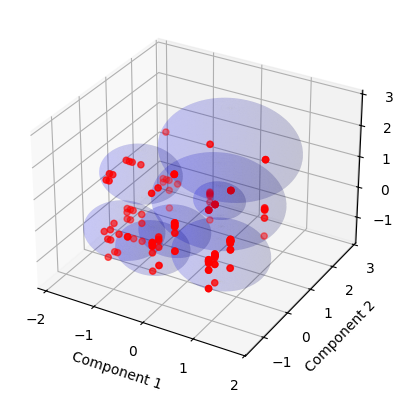

In [17]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = df['embedding'].apply(lambda x: x[0])
y = df['embedding'].apply(lambda x: x[1])
z = df['embedding'].apply(lambda x: x[2])

ax.scatter(x, y, z, c='r', marker='o')

for k, v in clusters.items():
    center, radius = get_bounding_circle(v)
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 100)
    x = center[0] + radius * np.outer(np.cos(u), np.sin(v))
    y = center[1] + radius * np.outer(np.sin(u), np.sin(v))
    z = center[2] + radius * np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(x, y, z, color='b', alpha=0.1)

ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')

plt.show()

Above figure can be more clearly viewed [here](https://www.desmos.com/3d/njmqmzwlyy) on desmos

In [18]:
k = 8
cluster_points = {i: [] for i in range(k)}
cluster_points_ground_truth = {i: [] for i in range(k)}

for i in range(len(df)):
    cluster_points[cluster_idxs[i]].append(df.index[i])
    cluster_points_ground_truth[cluster_idxs[i]].append(df['genre'][df.index[i]])

for i in range(k):
    print(f"Cluster {i} unique value counts:")
    print(pd.Series(cluster_points_ground_truth[i]).value_counts())
    print(f"Percentage of the maximum value in Cluster {i}:")
    print((pd.Series(cluster_points_ground_truth[i]).value_counts().max() / pd.Series(cluster_points_ground_truth[i]).value_counts().sum() * 100).round(2))

for i in range(k):
    print(f"{i} {pd.Series(cluster_points_ground_truth[i]).value_counts().idxmax()} {cluster_points_ground_truth[i].__len__()} {pd.Series(cluster_points_ground_truth[i]).value_counts().max() / pd.Series(cluster_points_ground_truth[i]).value_counts().sum() * 100}")

Cluster 0 unique value counts:
rock       20
country    16
pop         9
Name: count, dtype: int64
Percentage of the maximum value in Cluster 0:
44.44
Cluster 1 unique value counts:
rock         5
hip-hop      5
country      5
classical    4
pop          3
Name: count, dtype: int64
Percentage of the maximum value in Cluster 1:
22.73
Cluster 2 unique value counts:
hip-hop    10
pop         4
country     1
Name: count, dtype: int64
Percentage of the maximum value in Cluster 2:
66.67
Cluster 3 unique value counts:
rock       4
pop        2
country    2
Name: count, dtype: int64
Percentage of the maximum value in Cluster 3:
50.0
Cluster 4 unique value counts:
hip-hop    10
pop         5
Name: count, dtype: int64
Percentage of the maximum value in Cluster 4:
66.67
Cluster 5 unique value counts:
classical    7
hip-hop      4
pop          2
country      1
Name: count, dtype: int64
Percentage of the maximum value in Cluster 5:
50.0
Cluster 6 unique value counts:
classical    15
pop           4

In [19]:
df['genre'].value_counts()

genre
pop          31
rock         30
hip-hop      30
country      29
classical    27
Name: count, dtype: int64

Clearly, the value counts for the maximum value in each cluster is around 50-60% of the total songs in that cluster

In [20]:
def get_silhouette_score(cluster_idxs, points):
    a = np.zeros(len(points))
    b = np.zeros(len(points))
    for i in range(len(points)):
        a[i] = np.mean([euc_dist(np.array(points.iloc[i]), np.array(points.iloc[j])) for j in range(len(points)) if cluster_idxs[j] == cluster_idxs[i]])
        b[i] = np.min([np.mean([euc_dist(np.array(points.iloc[i]), np.array(points.iloc[j])) for j in range(len(points)) if cluster_idxs[j] != cluster_idxs[i]])])
    s = (b - a) / np.maximum(a, b)
    return np.mean(s)

In [21]:
get_silhouette_score(cluster_idxs, points)

np.float64(0.6910037791572703)

### Running experiments for different values of k and finding out their silhouette scores, the values seem to repeat forever

In [22]:
d = {}
for e in range(2, 20):
    k=e
    clusters, cluster_idxs = assign_clusters_for_k(e, points)
    shilhouette_score = get_silhouette_score(cluster_idxs, points)
    d[e] = shilhouette_score
    print("Silhouette Score for k =", e, ":", shilhouette_score)

Silhouette Score for k = 2 : 0.367157194843238
Silhouette Score for k = 3 : 0.4479954314724362
Silhouette Score for k = 4 : 0.5668541732518829
Silhouette Score for k = 5 : 0.5780186520254671
Silhouette Score for k = 6 : 0.6139041042790994
Silhouette Score for k = 7 : 0.6571103352925532
Silhouette Score for k = 8 : 0.6910037791572703
Silhouette Score for k = 9 : 0.7151012891344242
Silhouette Score for k = 10 : 0.7315715816578328
Silhouette Score for k = 11 : 0.7315715816578328
Silhouette Score for k = 12 : 0.7315715816578328
Silhouette Score for k = 13 : 0.7315715816578328
Silhouette Score for k = 14 : 0.7587598560591513
Silhouette Score for k = 15 : 0.7724762772057083
Silhouette Score for k = 16 : 0.7825475947428189
Silhouette Score for k = 17 : 0.7984611396293334
Silhouette Score for k = 18 : 0.7984611396293334
Silhouette Score for k = 19 : 0.7984611396293334


In [23]:
get_silhouette_score(cluster_idxs, points)

np.float64(0.7984611396293334)

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

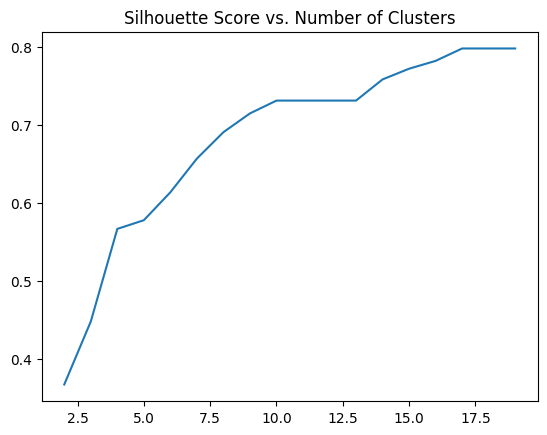

In [24]:
plt.plot(list(d.keys()), list(d.values()))
plt.title("Silhouette Score vs. Number of Clusters")

In [25]:
k = 8
clusters, cluster_idxs = assign_clusters_for_k(k, points)

* In order to assign genres to new data, we perform exactly the same operations onto them as we did when generating embeddings for our original dataset, using the means and standard deviations of our original data set
* We find out the closest cluster for this new data and assign the genre for the datapoint to be picked based on a binomial distribution on the genres present in the cluster 

In [26]:
to_assign = [
    ['piano', 'calm', 'slow'],
    ['guitar', 'emotional', 'distorted'],
    ['synth', 'mellow', 'distorted']
]

to_assign_df = pd.DataFrame(to_assign, columns=['keyword_1', 'keyword_2', 'keyword_3'])

In [27]:
to_assign_df['tf_idf_keyword_1'] = to_assign_df['keyword_1'].map(tf_idf_dict1)
to_assign_df['tf_idf_keyword_2'] = to_assign_df['keyword_2'].map(tf_idf_dict2)
to_assign_df['tf_idf_keyword_3'] = to_assign_df['keyword_3'].map(tf_idf_dict3)

In [28]:
to_assign_tf_idf_keyword_1_embeddings = np.array(to_assign_df['tf_idf_keyword_1'].tolist())
to_assign_tf_idf_keyword_2_embeddings = np.array(to_assign_df['tf_idf_keyword_2'].tolist())
to_assign_tf_idf_keyword_3_embeddings = np.array(to_assign_df['tf_idf_keyword_3'].tolist())

def standardize_data(data, mean, std):
    return (data - mean) / std

to_assign_tf_idf_keyword_1_embeddings = standardize_data(to_assign_tf_idf_keyword_1_embeddings, np.mean(tf_idf_keyword_1_embeddings, axis=0), np.std(tf_idf_keyword_1_embeddings, axis=0))
to_assign_tf_idf_keyword_2_embeddings = standardize_data(to_assign_tf_idf_keyword_2_embeddings, np.mean(tf_idf_keyword_2_embeddings, axis=0), np.std(tf_idf_keyword_2_embeddings, axis=0))
to_assign_tf_idf_keyword_3_embeddings = standardize_data(to_assign_tf_idf_keyword_3_embeddings, np.mean(tf_idf_keyword_3_embeddings, axis=0), np.std(tf_idf_keyword_3_embeddings, axis=0))

print(to_assign_tf_idf_keyword_1_embeddings)

key1_pca_data = perform_pca(eigenvector_subset1, to_assign_tf_idf_keyword_1_embeddings)
key2_pca_data = perform_pca(eigenvector_subset2, to_assign_tf_idf_keyword_2_embeddings)
key3_pca_data = perform_pca(eigenvector_subset3, to_assign_tf_idf_keyword_3_embeddings)

[[-0.20628425 -0.28439823 -0.89032743  3.35410197 -0.64300975 -0.27017161]
 [-0.20628425 -0.28439823  1.12318229 -0.2981424  -0.64300975 -0.27017161]
 [-0.20628425 -0.28439823 -0.89032743 -0.2981424   1.55518637 -0.27017161]]


In [29]:
to_assign_df['keyword_1_pca1'] = key1_pca_data[:, 0]
to_assign_df['keyword_1_pca2'] = key1_pca_data[:, 1]
to_assign_df['keyword_2_pca1'] = key2_pca_data[:, 0]
to_assign_df['keyword_2_pca2'] = key2_pca_data[:, 1]
to_assign_df['keyword_3_pca1'] = key3_pca_data[:, 0]
to_assign_df['keyword_3_pca2'] = key3_pca_data[:, 1]

In [30]:
to_assign_df

,keyword_1,keyword_2,keyword_3,tf_idf_keyword_1,tf_idf_keyword_2,tf_idf_keyword_3,keyword_1_pca1,keyword_1_pca2,keyword_2_pca1,keyword_2_pca2,keyword_3_pca1,keyword_3_pca2
0,piano,calm,slow,"[0.0, 0.0, 0.0, 0.20453272955026416, 0.0, 0.0]","[0.0, 0.1939993908420682, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29022845...",-0.547453,-1.942092,0.097351,-0.061593,-0.203708,-1.817350
1,guitar,emotional,distorted,"[0.0, 0.0, 0.36083636460817314, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.1939993908420682, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.11499981885525974, 0.0, 0.0, 0.0,...",1.349694,0.370477,0.097351,-0.061593,-0.047019,-0.192033
2,synth,mellow,distorted,"[0.0, 0.0, 0.0, 0.0, 0.35957140310654745, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3158529669721014, ...","[0.0, 0.0, 0.11499981885525974, 0.0, 0.0, 0.0,...",-1.556300,1.033730,1.239265,1.669606,-0.047019,-0.192033


In [31]:
to_assign_df['embedding'] = to_assign_df.apply(lambda x: [(x['keyword_1_pca1'] + x['keyword_1_pca2'])/2, (x['keyword_2_pca1'] + x['keyword_2_pca2'])/2, (x['keyword_3_pca1'] + x['keyword_3_pca2'])/2], axis=1)

In [32]:
def find_closest_cluster(point, clusters):
    min_dist = float('inf')
    closest_cluster = -1
    for cluster_id, cluster in clusters.items():
        dist = 0
        for pt in cluster['points']:
            dist += euc_dist(np.array(point), np.array(pt))
        dist /= len(cluster['points'])
        if dist < min_dist:
            min_dist = dist
            closest_cluster = cluster_id
    return closest_cluster

to_assign_df['closest_cluster'] = to_assign_df['embedding'].apply(lambda x: find_closest_cluster(x, clusters))
to_assign_df

,keyword_1,keyword_2,keyword_3,tf_idf_keyword_1,tf_idf_keyword_2,tf_idf_keyword_3,keyword_1_pca1,keyword_1_pca2,keyword_2_pca1,keyword_2_pca2,keyword_3_pca1,keyword_3_pca2,embedding,closest_cluster
0,piano,calm,slow,"[0.0, 0.0, 0.0, 0.20453272955026416, 0.0, 0.0]","[0.0, 0.1939993908420682, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29022845...",-0.547453,-1.942092,0.097351,-0.061593,-0.203708,-1.817350,"[-1.2447726110219328, 0.017879133459971632, -1...",6
1,guitar,emotional,distorted,"[0.0, 0.0, 0.36083636460817314, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.1939993908420682, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.11499981885525974, 0.0, 0.0, 0.0,...",1.349694,0.370477,0.097351,-0.061593,-0.047019,-0.192033,"[0.8600854425005058, 0.017879133459974685, -0....",0
2,synth,mellow,distorted,"[0.0, 0.0, 0.0, 0.0, 0.35957140310654745, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3158529669721014, ...","[0.0, 0.0, 0.11499981885525974, 0.0, 0.0, 0.0,...",-1.556300,1.033730,1.239265,1.669606,-0.047019,-0.192033,"[-0.26128488644763737, 1.4544354724280497, -0....",1


In [46]:
def assign_genre_based_on_binomial(odf, col='closest_cluster'):
    genre_assignments = []
    for idx, row in odf.iterrows():
        closest_cluster = row[col]
        cluster_genres = cluster_points_ground_truth[closest_cluster]
        genre_counts = pd.Series(cluster_genres).value_counts()
        total_genres = genre_counts.sum()
        
        probabilities = genre_counts / total_genres
        genres = probabilities.index.tolist()
        probs = probabilities.values.tolist()
        
        assigned_genre = np.random.choice(genres, p=probs)
        genre_assignments.append(assigned_genre)
    
    return genre_assignments

to_assign_df['assigned_genre'] = assign_genre_based_on_binomial(to_assign_df)
to_assign_df

,keyword_1,keyword_2,keyword_3,tf_idf_keyword_1,tf_idf_keyword_2,tf_idf_keyword_3,keyword_1_pca1,keyword_1_pca2,keyword_2_pca1,keyword_2_pca2,keyword_3_pca1,keyword_3_pca2,embedding,closest_cluster,assigned_genre
0,piano,calm,slow,"[0.0, 0.0, 0.0, 0.20453272955026416, 0.0, 0.0]","[0.0, 0.1939993908420682, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.29022845...",-0.547453,-1.942092,0.097351,-0.061593,-0.203708,-1.817350,"[-1.2447726110219328, 0.017879133459971632, -1...",6,classical
1,guitar,emotional,distorted,"[0.0, 0.0, 0.36083636460817314, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.1939993908420682, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.11499981885525974, 0.0, 0.0, 0.0,...",1.349694,0.370477,0.097351,-0.061593,-0.047019,-0.192033,"[0.8600854425005058, 0.017879133459974685, -0....",0,rock
2,synth,mellow,distorted,"[0.0, 0.0, 0.0, 0.0, 0.35957140310654745, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.3158529669721014, ...","[0.0, 0.0, 0.11499981885525974, 0.0, 0.0, 0.0,...",-1.556300,1.033730,1.239265,1.669606,-0.047019,-0.192033,"[-0.26128488644763737, 1.4544354724280497, -0....",1,hip-hop


#### These new datapoints can be visualized as the bigger balls on desmos: [here](https://www.desmos.com/3d/bqnuuli8ra)

### Calulating the Rand Index, an extrinsic clustering score

In [47]:
df['closest_cluster'] = cluster_idxs

In [56]:
def rand_index(true_labels, predicted_labels):
    assert len(true_labels) == len(predicted_labels), "The length of true_labels and predicted_labels must be the same."
    
    n = len(true_labels)
    a = b = 0
    
    for i in range(n):
        for j in range(i + 1, n):
            same_cluster_true = (true_labels[i] == true_labels[j])
            same_cluster_pred = (predicted_labels[i] == predicted_labels[j])
            
            if same_cluster_true and same_cluster_pred:
                a += 1
            elif not same_cluster_true and not same_cluster_pred:
                b += 1
    
    total_pairs = n * (n - 1) // 2
    rand_index_value = (a + b) / total_pairs
    return rand_index_value

unique_genres = df['genre'].unique()
genre_to_key = {genre: idx for idx, genre in enumerate(unique_genres)}

true_labels = df['genre'].values
predicted_labels = assign_genre_based_on_binomial(df)
true_labels = [genre_to_key[genre] for genre in true_labels]
predicted_labels = [genre_to_key[genre] for genre in predicted_labels]
print(predicted_labels)

r_index = rand_index(true_labels, predicted_labels)
print("Rand Index:", r_index)

[4, 1, 2, 3, 3, 1, 4, 0, 2, 0, 2, 4, 0, 1, 0, 4, 4, 2, 4, 3, 2, 2, 1, 3, 2, 4, 2, 0, 1, 2, 0, 0, 1, 0, 3, 4, 3, 1, 4, 2, 2, 1, 3, 2, 2, 2, 3, 3, 0, 0, 1, 2, 2, 3, 2, 0, 2, 4, 1, 1, 0, 0, 3, 0, 3, 3, 3, 0, 3, 1, 2, 3, 1, 3, 3, 1, 1, 4, 1, 3, 0, 3, 2, 4, 3, 0, 2, 2, 0, 4, 1, 3, 4, 4, 4, 4, 2, 3, 0, 0, 2, 3, 3, 4, 4, 1, 4, 4, 1, 1, 2, 2, 4, 4, 2, 3, 1, 1, 2, 3, 1, 0, 1, 2, 4, 1, 4, 3, 1, 0, 4, 4, 3, 2, 4, 2, 4, 3, 3, 0, 1, 0, 3, 4, 0, 2, 3]
Rand Index: 0.7360916969527537


: 

#### Ingenious embeddings for words:
We assign ranks to keywords based on which one appears the most. i.e. The mode would have a rank 1 and so on... We then normalize these values by divising by the total number of datapoints. Thus, we obtain a three dimensional embedding for every datapoint.

In [36]:
def assign_ranks(df: pd.DataFrame, col):
    value_counts = df[col].value_counts()
    ranks = value_counts.rank(method='dense', ascending=False).astype(int)
    return ranks

keyword1_ranks = assign_ranks(df, 'keyword_1')
keyword2_ranks = assign_ranks(df, 'keyword_2')
keyword3_ranks = assign_ranks(df, 'keyword_3')

keyword1_ranks /= len(keyword1_ranks)
keyword2_ranks /= len(keyword2_ranks)
keyword3_ranks /= len(keyword3_ranks) 

df['embedding_2'] = df.apply(lambda x: [keyword1_ranks[x['keyword_1']], keyword2_ranks[x['keyword_2']], keyword3_ranks[x['keyword_3']]], axis=1)

points_2 = df['embedding_2']

### Experimenting with several values of k
Clearly, k = 6 is a good choice

In [37]:
d = {}
for e in range(2, 20):
    k=e
    clusters_2, cluster_idxs_2 = assign_clusters_for_k(e, points_2)
    shilhouette_score = get_silhouette_score(cluster_idxs_2, points_2)
    d[e] = shilhouette_score
    print("Silhouette Score for k =", e, ":", shilhouette_score)

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\_core\_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Silhouette Score for k = 2 : nan
Silhouette Score for k = 3 : nan
Silhouette Score for k = 4 : 0.28881710080887635
Silhouette Score for k = 5 : 0.28881710080887635
Silhouette Score for k = 6 : 0.4202544795394415
Silhouette Score for k = 7 : 0.4202544795394415
Silhouette Score for k = 8 : 0.28881710080887635
Silhouette Score for k = 9 : 0.28881710080887635
Silhouette Score for k = 10 : 0.28881710080887635
Silhouette Score for k = 11 : 0.41103330833313056
Silhouette Score for k = 12 : 0.41103330833313056
Silhouette Score for k = 13 : 0.41103330833313056
Silhouette Score for k = 14 : 0.47691175334512176
Silhouette Score for k = 15 : 0.4320701236118353
Silhouette Score for k = 16 : 0.4935617907977208
Silhouette Score for k = 17 : 0.4935617907977208
Silhouette Score for k = 18 : 0.5236703956552767
Silhouette Score for k = 19 : 0.5236703956552767


In [38]:
k = 6
clusters_2, cluster_idxs_2 = assign_clusters_for_k(k, points_2)

In [39]:
k = 6
cluster_points_2 = {i: [] for i in range(k)}
cluster_points_ground_truth_2 = {i: [] for i in range(k)}

for i in range(len(df)):
    cluster_points_2[cluster_idxs_2[i]].append(df.index[i])
    cluster_points_ground_truth_2[cluster_idxs_2[i]].append(df['genre'][df.index[i]])

In [40]:
get_silhouette_score(cluster_idxs_2, points_2)

np.float64(0.4202544795394415)

Text(0.5, 1.0, 'Silhouette Score vs. Number of Clusters')

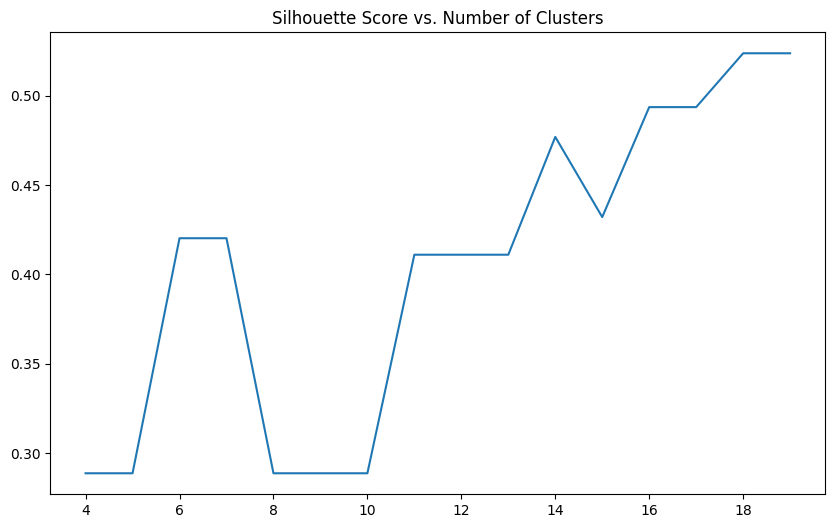

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(list(d.keys()), list(d.values()))
plt.title("Silhouette Score vs. Number of Clusters")

In [42]:
df['assigned_cluster_2'] = cluster_idxs_2
assigned = assign_genre_based_on_binomial(df, col='assigned_cluster_2')

predicted_labels_2 = [genre_to_key[genre] for genre in assigned]
rand_index(true_labels, predicted_labels_2)

0.6644301556238934

### Further Exploration of the dataset

Exploring the genre v/s keyword relation

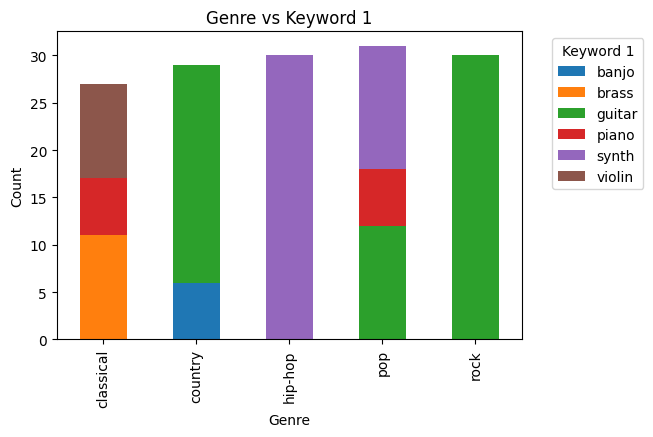

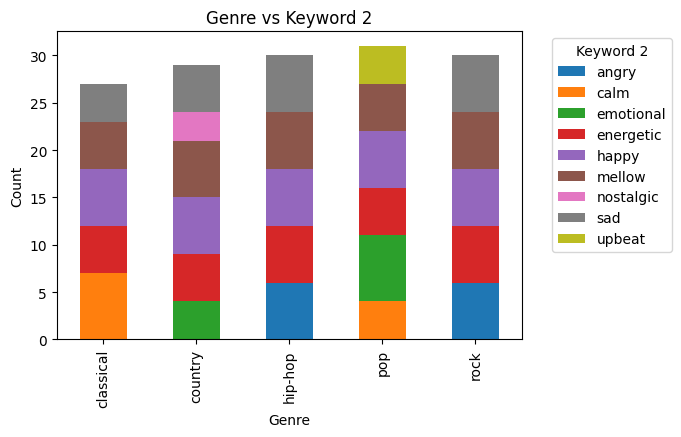

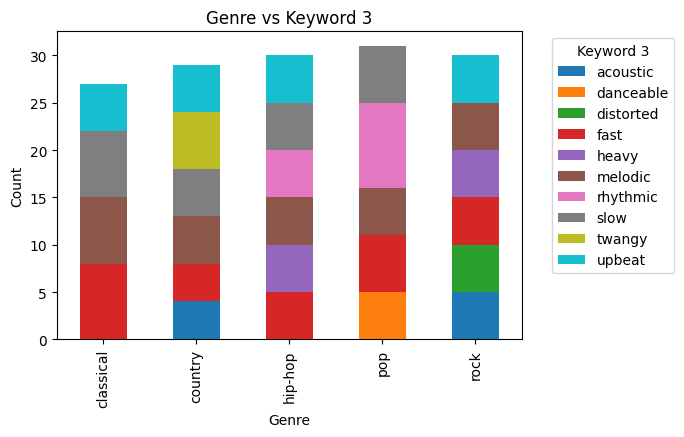

In [43]:
genre_keyword1 = pd.crosstab(df['genre'], df['keyword_1'])
genre_keyword2 = pd.crosstab(df['genre'], df['keyword_2'])
genre_keyword3 = pd.crosstab(df['genre'], df['keyword_3'])

ax1 = genre_keyword1.plot(kind='bar', stacked=True, figsize=(6, 4))
ax1.set_title('Genre vs Keyword 1')
ax1.set_xlabel('Genre')
ax1.set_ylabel('Count')
ax1.legend(title='Keyword 1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

ax2 = genre_keyword2.plot(kind='bar', stacked=True, figsize=(6, 4))
ax2.set_title('Genre vs Keyword 2')
ax2.set_xlabel('Genre')
ax2.set_ylabel('Count')
ax2.legend(title='Keyword 2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

ax3 = genre_keyword3.plot(kind='bar', stacked=True, figsize=(6, 4))
ax3.set_title('Genre vs Keyword 3')
ax3.set_xlabel('Genre')
ax3.set_ylabel('Count')
ax3.legend(title='Keyword 3', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Analysing the correlation matrix

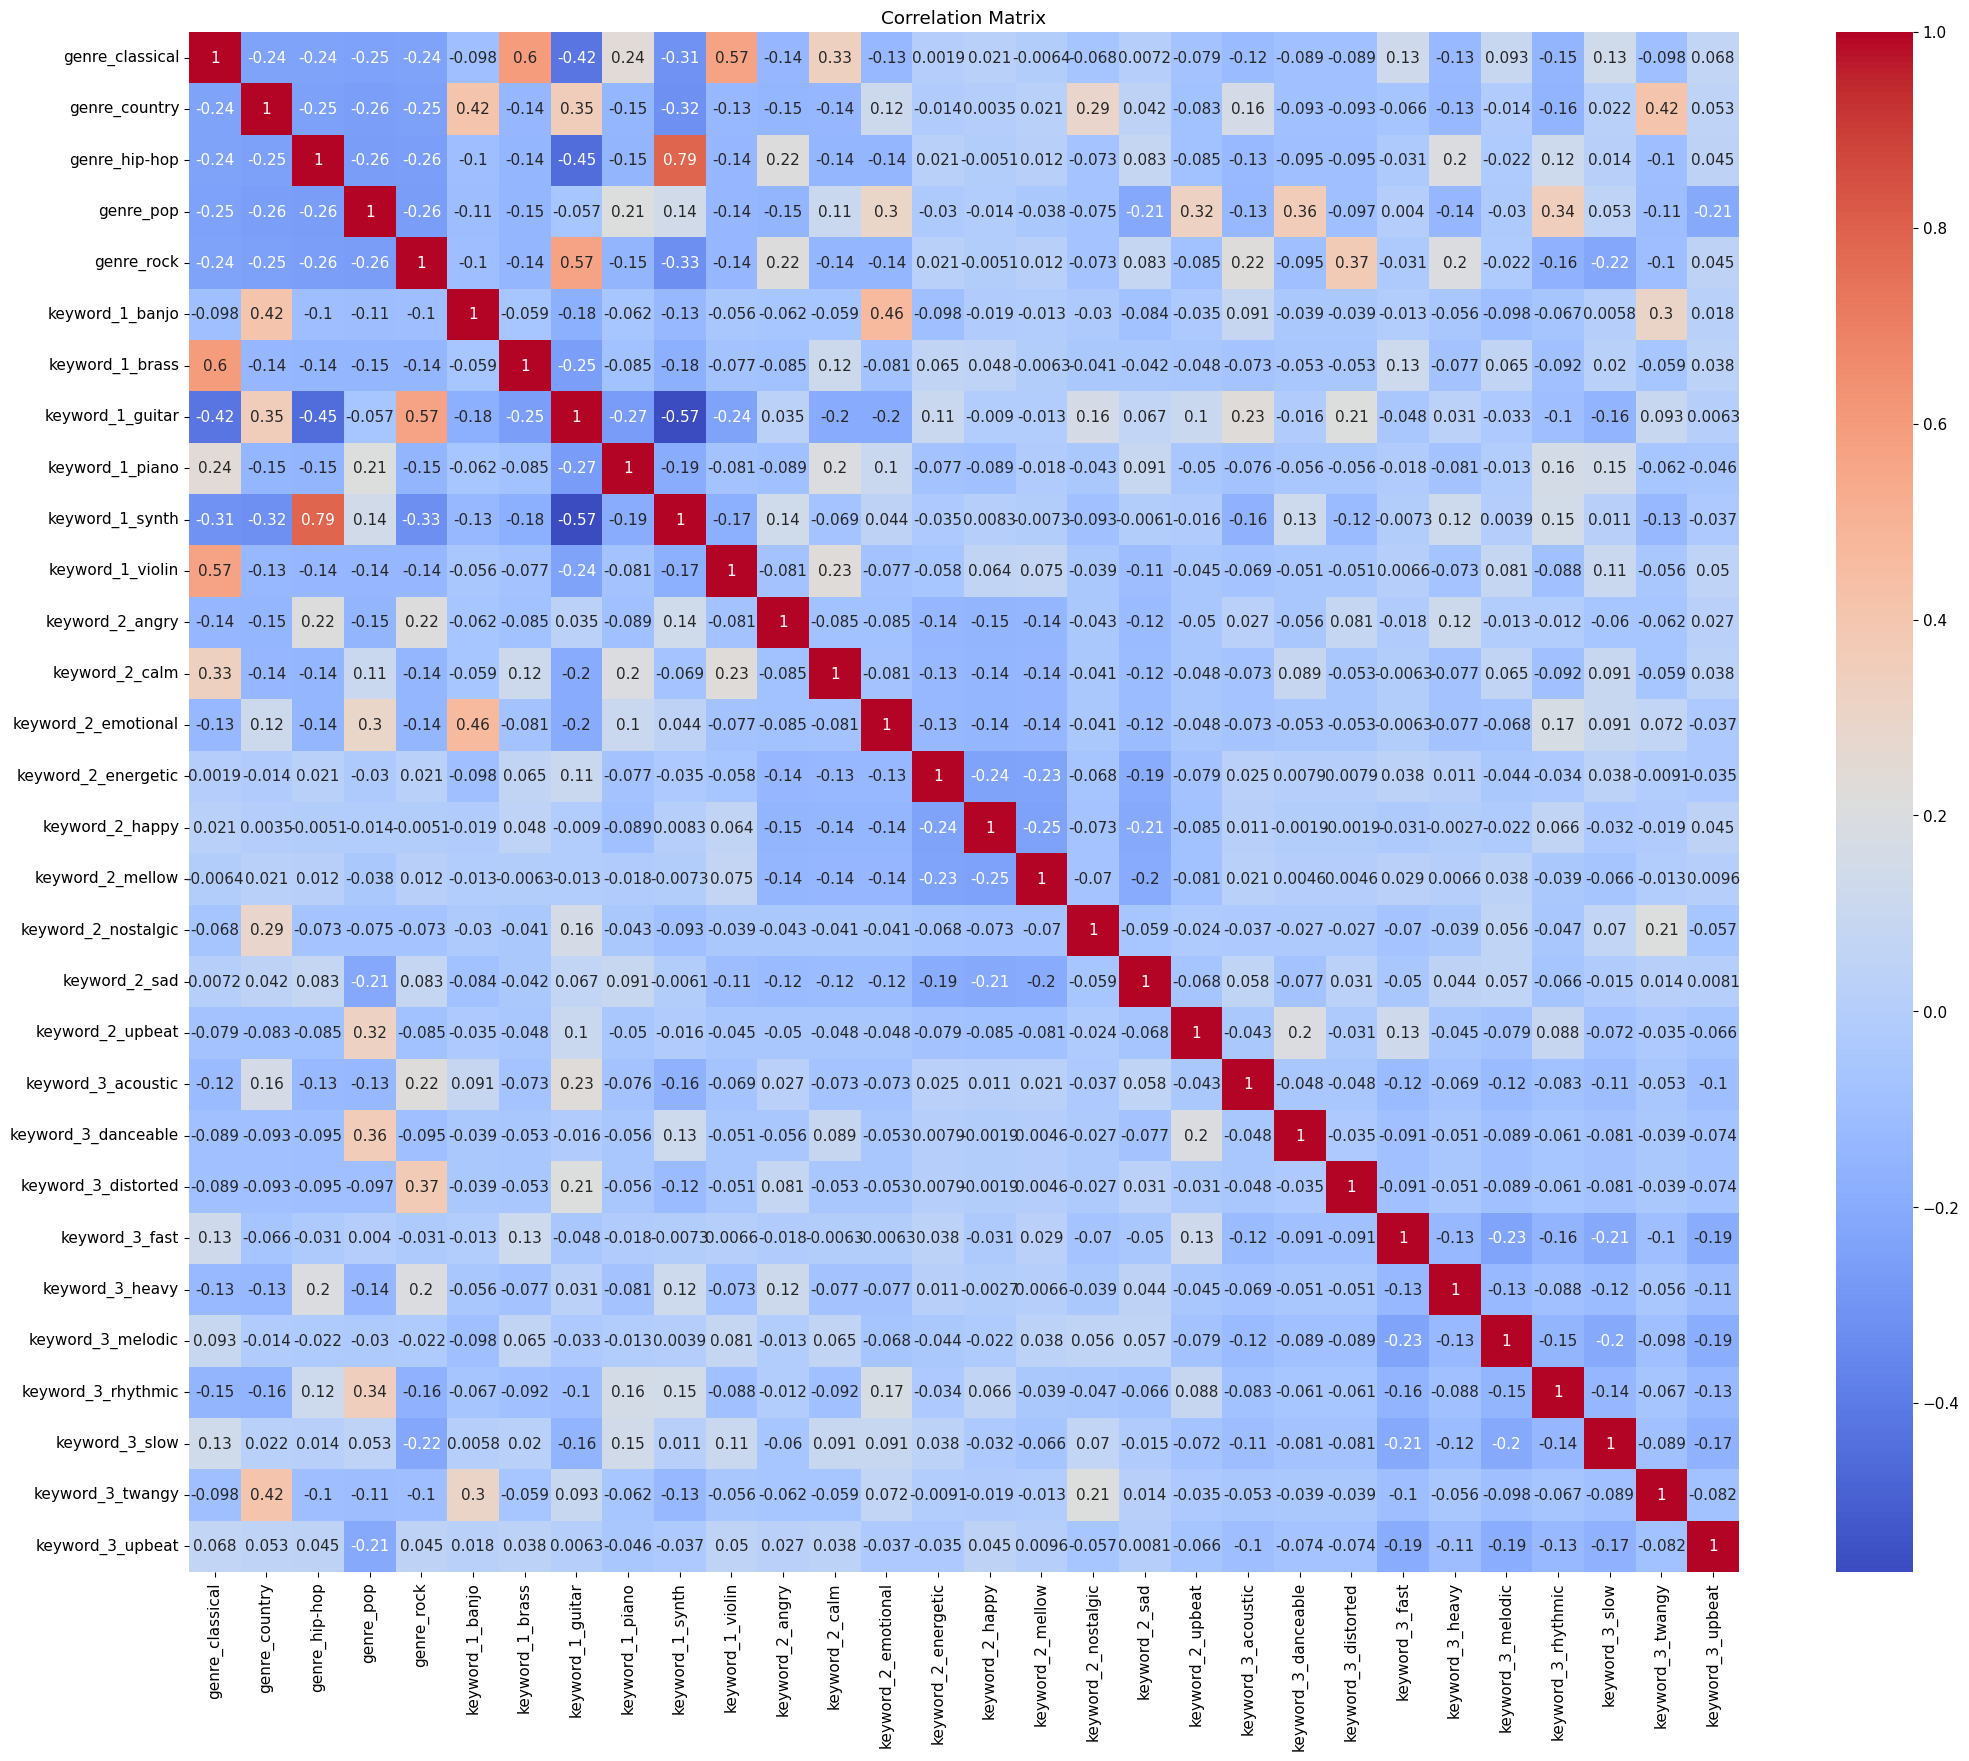

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

df_encoded = pd.get_dummies(df[['genre', 'keyword_1', 'keyword_2', 'keyword_3']])

corr = df_encoded.corr()

plt.figure(figsize=(25, 20))
plt.rcParams.update({'font.size': 11})
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()

keyword co-occurence matrix

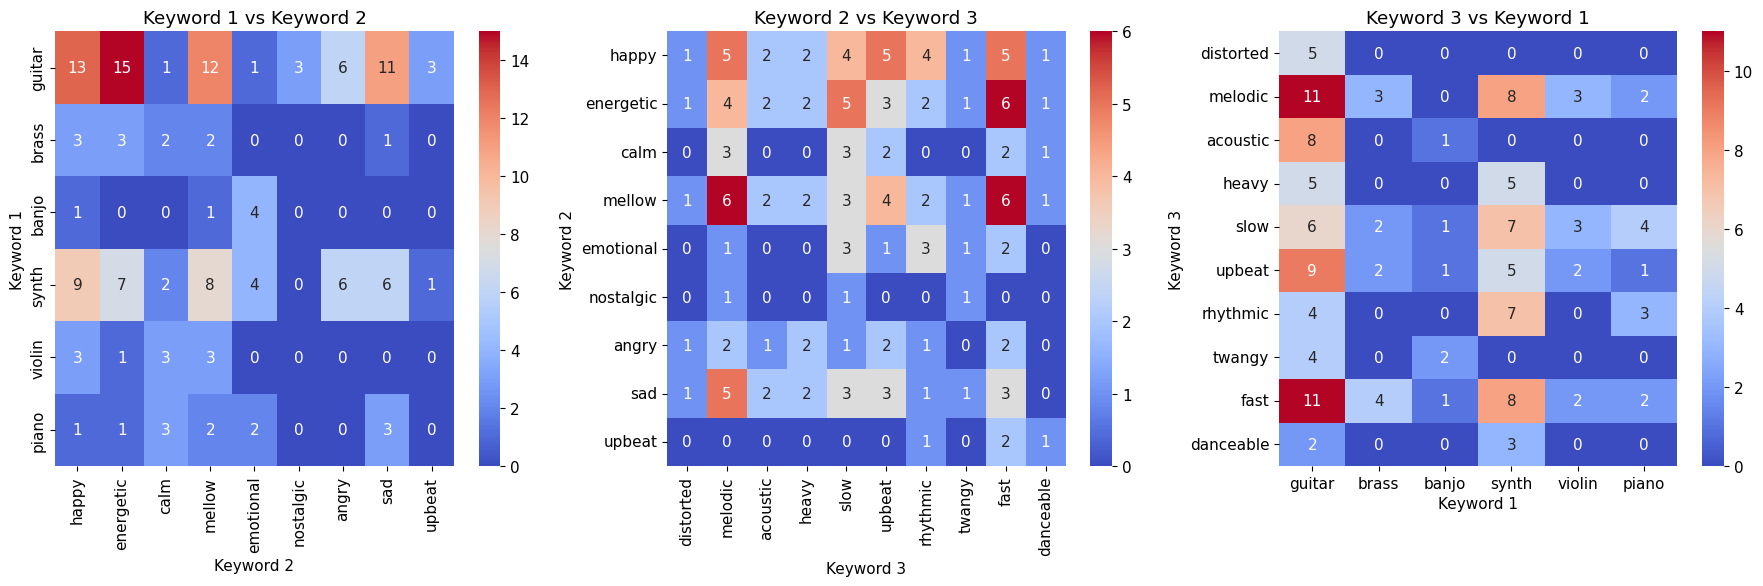

In [45]:
unique_keywords_1 = df['keyword_1'].unique()
unique_keywords_2 = df['keyword_2'].unique()
unique_keywords_3 = df['keyword_3'].unique()

co_occurrence_kw1_kw2 = pd.crosstab(df['keyword_1'], df['keyword_2'])
co_occurrence_kw2_kw3 = pd.crosstab(df['keyword_2'], df['keyword_3'])
co_occurrence_kw3_kw1 = pd.crosstab(df['keyword_3'], df['keyword_1'])

co_occurrence_kw1_kw2 = co_occurrence_kw1_kw2.reindex(index=unique_keywords_1, columns=unique_keywords_2, fill_value=0)
co_occurrence_kw2_kw3 = co_occurrence_kw2_kw3.reindex(index=unique_keywords_2, columns=unique_keywords_3, fill_value=0)
co_occurrence_kw3_kw1 = co_occurrence_kw3_kw1.reindex(index=unique_keywords_3, columns=unique_keywords_1, fill_value=0)

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(co_occurrence_kw1_kw2, annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Keyword 1 vs Keyword 2')
axes[0].set_xlabel('Keyword 2')
axes[0].set_ylabel('Keyword 1')

sns.heatmap(co_occurrence_kw2_kw3, annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Keyword 2 vs Keyword 3')
axes[1].set_xlabel('Keyword 3')
axes[1].set_ylabel('Keyword 2')

sns.heatmap(co_occurrence_kw3_kw1, annot=True, cmap='coolwarm', ax=axes[2])
axes[2].set_title('Keyword 3 vs Keyword 1')
axes[2].set_xlabel('Keyword 1')
axes[2].set_ylabel('Keyword 3')

plt.tight_layout()
plt.show()